In [115]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
sales_data = pd.read_csv('sales.csv')
sales_data

C:\Users\Manish_Bhoge\AppData\Local\Temp\ipykernel_18568\3671999420.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv('sales.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [117]:
store_data = pd.read_csv('store.csv')
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [118]:
sales_store_joined_df = pd.merge(sales_data, store_data, how='left', on=['Store'])

# Ignore the customer column for this analysis, since we might not know the customer count for future dates

In [175]:
sales_store_final_df = sales_store_joined_df.query('Sales!=0').drop(['Customers'], axis=1) ## 172871 rows × 18 columns

# Split the Dataset into the Features and Target variables

In [176]:
features = sales_store_final_df.iloc[ : ,sales_store_final_df.columns != 'Sales']
features

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


In [181]:
target = sales_store_final_df.iloc[:, sales_store_final_df.columns == 'Sales'] #outcome predicted target or dependent variable
target

,Sales
0,5263
1,6064
2,8314
3,13995
4,4822
...,...
1016776,3375
1016827,10765
1016863,5035
1017042,4491


In [183]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Open                       844338 non-null  int64  
 4   Promo                      844338 non-null  int64  
 5   StateHoliday               844338 non-null  object 
 6   SchoolHoliday              844338 non-null  int64  
 7   StoreType                  844338 non-null  object 
 8   Assortment                 844338 non-null  object 
 9   CompetitionDistance        842152 non-null  float64
 10  CompetitionOpenSinceMonth  575738 non-null  float64
 11  CompetitionOpenSinceYear   575738 non-null  float64
 12  Promo2                     844338 non-null  int64  
 13  Promo2SinceWeek            4

In [184]:
print(features.isnull().sum())
print('-----------------------------------')
print(features.isna().sum())

Store                             0
DayOfWeek                         0
Date                              0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
Promo2SinceWeek              423292
Promo2SinceYear              423292
PromoInterval                423292
dtype: int64
-----------------------------------
Store                             0
DayOfWeek                         0
Date                              0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpen

In [204]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,844338.0,558.421374,321.730861,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844338.0,3.520350,1.723712,1.0,2.0,3.0,5.0,7.0
Promo,844338.0,0.446356,0.497114,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,844338.0,0.193578,0.395102,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,842152.0,5458.156627,7809.573181,20.0,710.0,2320.0,6890.0,75860.0
CompetitionOpenSinceMonth,575738.0,7.224842,3.210118,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,575738.0,2008.697753,5.978064,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,844338.0,0.498670,0.499999,0.0,0.0,0.0,1.0,1.0
Promo2SinceWeek,421046.0,23.254177,14.100647,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,421046.0,2011.753929,1.660946,2009.0,2011.0,2012.0,2013.0,2015.0


# Summary Explanation
1. Standard Deviation of columns Store, CompetitionDistance are very high we need to normalize/standardize these columns.
2. Standard Deviation of Open column is 0. so, this column can be excluded from the analysis 

In [187]:
features = features.drop(['Open'], axis=1)

In [190]:
features

,Store,DayOfWeek,Date,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


In [189]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Promo                      844338 non-null  int64  
 4   StateHoliday               844338 non-null  object 
 5   SchoolHoliday              844338 non-null  int64  
 6   StoreType                  844338 non-null  object 
 7   Assortment                 844338 non-null  object 
 8   CompetitionDistance        842152 non-null  float64
 9   CompetitionOpenSinceMonth  575738 non-null  float64
 10  CompetitionOpenSinceYear   575738 non-null  float64
 11  Promo2                     844338 non-null  int64  
 12  Promo2SinceWeek            421046 non-null  float64
 13  Promo2SinceYear            4

# Split the features into Numerical and Categorical variables

In [197]:
df_num_features = features.select_dtypes(include='number')
df_cat_features = features.select_dtypes(include='object')

# We'll look at the SimpleImputer to replace missing values in numeric column values with the Median 

In [198]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [199]:
imputer.fit(df_num_features)


SimpleImputer(strategy='median')

In [200]:
X = imputer.transform(df_num_features)

In [201]:
df_num_features_imptd = pd.DataFrame(X, columns = df_num_features.columns, index=df_num_features.index)

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

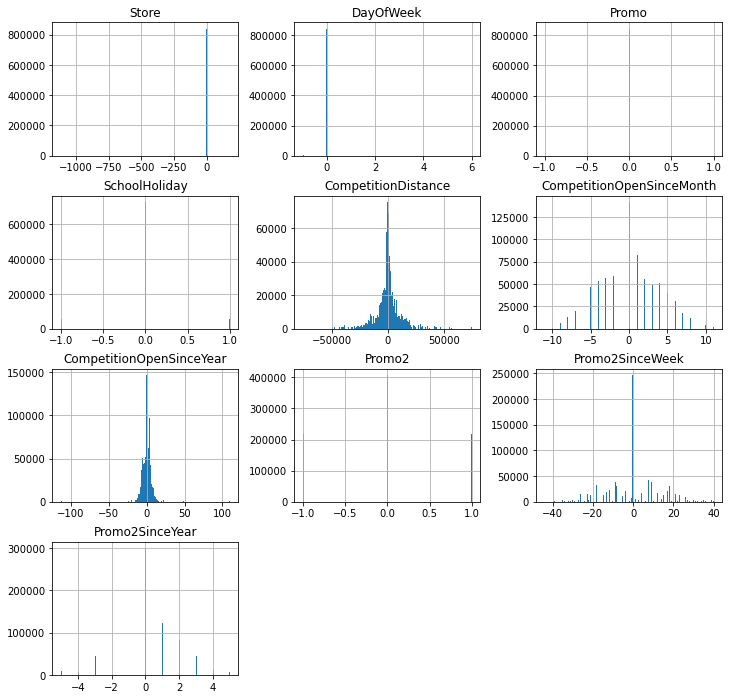

In [205]:
df_num_features_imptd[df_num_features_imptd.columns].diff().hist(bins=200, figsize=(12,12))

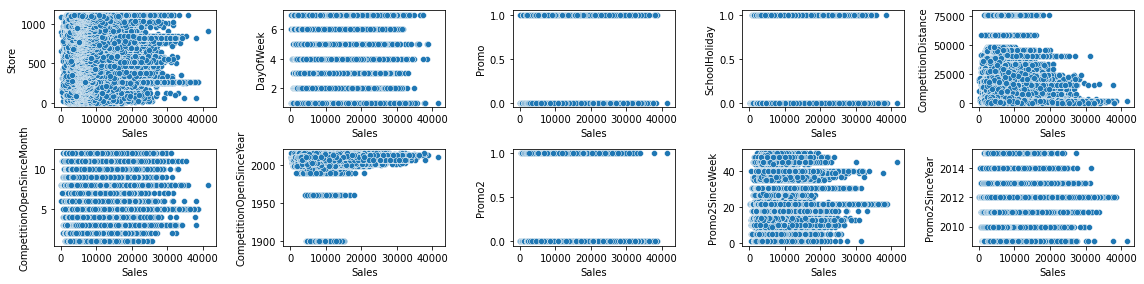

In [216]:
df_num_features_imptd_wth_tgt = pd.concat([df_num_features_imptd, target], axis=1, join='inner')

rows = 2
cols = 5
fig, ax = plt.subplots(rows, cols, figsize = (16,4))
col = df_num_features_imptd_wth_tgt.columns
index = 0 
for i in range(rows):
    for j in range(cols):
        sns.scatterplot(x='Sales', y=col[index], data = df_num_features_imptd_wth_tgt, ax = ax[i][j])
        index = index + 1
plt.tight_layout()      

In [224]:
corr_mat = df_num_features_imptd_wth_tgt.corr()

<AxesSubplot:>

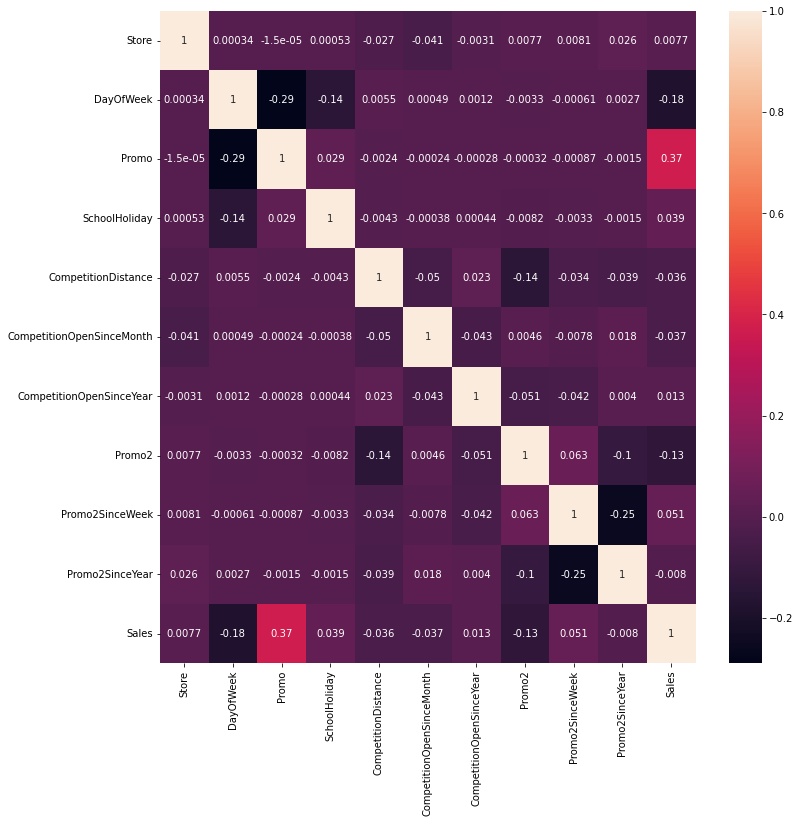

In [228]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_mat, annot=True)

# The below list of columns are missing data values:
CompetitionDistance, 
CompetitionOpenSinceMonth,
CompetitionOpenSinceYear,
Promo2SinceWeek,
Promo2SinceYear,
PromoInterval,

In [121]:
df_numerical_features.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
SchoolHoliday                     0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
dtype: int64

# We'll look at the SimpleImputer to replace these numeric column values with the Median 

In [122]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [123]:
df_numerical_features = sales_store_joined_df.select_dtypes(include='number')
df_categorical_features = sales_store_joined_df.select_dtypes(include='object')

In [124]:
df_categorical_features

,Date,StateHoliday,StoreType,Assortment,PromoInterval
0,2015-07-31,0,c,a,NaN
1,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
2,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
3,2015-07-31,0,c,c,NaN
4,2015-07-31,0,a,a,NaN
...,...,...,...,...,...
1017204,2013-01-01,a,a,a,"Jan,Apr,Jul,Oct"
1017205,2013-01-01,a,c,c,NaN
1017206,2013-01-01,a,a,c,NaN
1017207,2013-01-01,a,a,c,NaN


# Now there is NO missing values in the numeric columns

In [149]:
df_numerical_features_trnsfrm.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
SchoolHoliday                0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
dtype: int64

# Now, let's deal with the Categorical variables

In [150]:
## only PromoInterval column has null
df_categorical_features.isnull().sum()

Date                  0
StateHoliday          0
StoreType             0
Assortment            0
PromoInterval    508031
dtype: int64

In [151]:
df_categorical_features

,Date,StateHoliday,StoreType,Assortment,PromoInterval
0,2015-07-31,0,c,a,NaN
1,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
2,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
3,2015-07-31,0,c,c,NaN
4,2015-07-31,0,a,a,NaN
...,...,...,...,...,...
1017204,2013-01-01,a,a,a,"Jan,Apr,Jul,Oct"
1017205,2013-01-01,a,c,c,NaN
1017206,2013-01-01,a,a,c,NaN
1017207,2013-01-01,a,a,c,NaN


In [152]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df_categorical_features)

SimpleImputer(strategy='most_frequent')

In [153]:
Y = imputer.transform(df_categorical_features)

In [154]:
df_categorical_features_trnsfrm = pd.DataFrame(Y, columns = df_categorical_features.columns, index=df_categorical_features.index)

In [155]:
df_categorical_features_trnsfrm.isnull().sum()

Date             0
StateHoliday     0
StoreType        0
Assortment       0
PromoInterval    0
dtype: int64

# Now there is NO missing values in the categorical columns too

In [156]:
df_categorical_features_trnsfrm.columns

Index(['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [157]:
from operator import attrgetter
dt_attrs = ['year','month','day']
df_categorical_features_trnsfrm['Date'] = pd.to_datetime(df_categorical_features_trnsfrm['Date'])
# extract attributes
attributes = df_categorical_features_trnsfrm['Date'].apply(attrgetter(*dt_attrs))
df_categorical_features_trnsfrm[dt_attrs] = pd.DataFrame(attributes.values.tolist())
df_categorical_features_trnsfrm = df_categorical_features_trnsfrm.drop('Date', axis=1)

In [158]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_categorical_features_trnsfrm_encded = ordinal_encoder.fit_transform(df_categorical_features_trnsfrm[['StoreType','Assortment','PromoInterval']])

In [161]:
df = pd.DataFrame(df_categorical_features_trnsfrm_encded, columns = ['StoreType','Assortment','PromoInterval'])


In [162]:
df_categorical_features_trnsfrm.drop(['StateHoliday','StoreType','Assortment','PromoInterval'],index=1)

ValueError: Cannot specify both 'labels' and 'index'/'columns'

# Combine the datasets to form with original dataframe

In [78]:
final_sales_store_df = pd.concat([df_numerical_features_trnsfrm, df_categorical_features_trnsfrm], axis=1, join='inner')

In [79]:
final_sales_store_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Date,StateHoliday,StoreType,Assortment,PromoInterval
0,1.0,5.0,5263.0,555.0,1.0,1.0,1.0,1270.0,9.0,2008.0,0.0,22.0,2012.0,2015-07-31,0,c,a,"Jan,Apr,Jul,Oct"
1,2.0,5.0,6064.0,625.0,1.0,1.0,1.0,570.0,11.0,2007.0,1.0,13.0,2010.0,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
2,3.0,5.0,8314.0,821.0,1.0,1.0,1.0,14130.0,12.0,2006.0,1.0,14.0,2011.0,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
3,4.0,5.0,13995.0,1498.0,1.0,1.0,1.0,620.0,9.0,2009.0,0.0,22.0,2012.0,2015-07-31,0,c,c,"Jan,Apr,Jul,Oct"
4,5.0,5.0,4822.0,559.0,1.0,1.0,1.0,29910.0,4.0,2015.0,0.0,22.0,2012.0,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111.0,2.0,0.0,0.0,0.0,0.0,1.0,1900.0,6.0,2014.0,1.0,31.0,2013.0,2013-01-01,a,a,a,"Jan,Apr,Jul,Oct"
1017205,1112.0,2.0,0.0,0.0,0.0,0.0,1.0,1880.0,4.0,2006.0,0.0,22.0,2012.0,2013-01-01,a,c,c,"Jan,Apr,Jul,Oct"
1017206,1113.0,2.0,0.0,0.0,0.0,0.0,1.0,9260.0,8.0,2010.0,0.0,22.0,2012.0,2013-01-01,a,a,c,"Jan,Apr,Jul,Oct"
1017207,1114.0,2.0,0.0,0.0,0.0,0.0,1.0,870.0,8.0,2010.0,0.0,22.0,2012.0,2013-01-01,a,a,c,"Jan,Apr,Jul,Oct"


In [80]:
final_sales_store_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,7.469899e+00,2.009107e+03,5.005638e-01,2.263526e+01,2.011876e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,2.677243e+00,4.986802e+00,4.999999e-01,9.993137e+00,1.182965e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,2.200000e+01,2.012000e+03
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000e+00,2.010000e+03,1.000000e+00,2.200000e+01,2.012000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [99]:
PromoInterval_df = final_sales_store_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StateHoliday,StoreType,Assortment,PromoInterval,year,month,day
0,1.0,5.0,5263.0,555.0,1.0,1.0,1.0,1270.0,9.0,2008.0,0.0,22.0,2012.0,0,c,a,"Jan,Apr,Jul,Oct",2015,7,31
1,2.0,5.0,6064.0,625.0,1.0,1.0,1.0,570.0,11.0,2007.0,1.0,13.0,2010.0,0,a,a,"Jan,Apr,Jul,Oct",2015,7,31
2,3.0,5.0,8314.0,821.0,1.0,1.0,1.0,14130.0,12.0,2006.0,1.0,14.0,2011.0,0,a,a,"Jan,Apr,Jul,Oct",2015,7,31
3,4.0,5.0,13995.0,1498.0,1.0,1.0,1.0,620.0,9.0,2009.0,0.0,22.0,2012.0,0,c,c,"Jan,Apr,Jul,Oct",2015,7,31
4,5.0,5.0,4822.0,559.0,1.0,1.0,1.0,29910.0,4.0,2015.0,0.0,22.0,2012.0,0,a,a,"Jan,Apr,Jul,Oct",2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111.0,2.0,0.0,0.0,0.0,0.0,1.0,1900.0,6.0,2014.0,1.0,31.0,2013.0,a,a,a,"Jan,Apr,Jul,Oct",2013,1,1
1017205,1112.0,2.0,0.0,0.0,0.0,0.0,1.0,1880.0,4.0,2006.0,0.0,22.0,2012.0,a,c,c,"Jan,Apr,Jul,Oct",2013,1,1
1017206,1113.0,2.0,0.0,0.0,0.0,0.0,1.0,9260.0,8.0,2010.0,0.0,22.0,2012.0,a,a,c,"Jan,Apr,Jul,Oct",2013,1,1
1017207,1114.0,2.0,0.0,0.0,0.0,0.0,1.0,870.0,8.0,2010.0,0.0,22.0,2012.0,a,a,c,"Jan,Apr,Jul,Oct",2013,1,1


In [98]:
 pd.DataFrame(final_sales_store_df_encded, columns = final_sales_store_df.columns, index=final_sales_store_df.index)

ValueError: Shape of passed values is (1017209, 1), indices imply (1017209, 20)

In [92]:
ordinal_encoder.categories_

[array(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'],
       dtype=object)]